In [1]:
# load basic libraries
import pandas as pd
import numpy as np
import os
# Get the directory of the current file and set as path
path = os.getcwd()

# plotting libraries
import matplotlib.pyplot as plt

In [2]:
# set the basic allergen types and products
common_allergens = {
    'cows milk': {'Cheese', 'Butter', 'Margarine', 'Yogurt', 'Cream', 'Ice cream'},
    'eggs': {' egg'},
    'tree nuts': {'Brazil nut', 'Almond', 'Cashew', 'Macadamia nut', 'Pistachio','Pine nut','Walnut'},
    'peanuts': {'peanut'},
    'shellfish': {'Shrimp','Prawn','Crayfish', 'Lobster', 'Squid', 'Scallops'},
    'wheat': {'flour', 'wheat', 'pasta', 'noodle', 'bread', 'crust'},
    'soy': {'soy', 'tofu'},
    'fish': {'fish', 'seafood'}
}

In [3]:
# read the image feature json file from image subset
image_overview_df = pd.read_json(path +'/feature_food/image_subset.json')
image_overview_df.sample(3)

id      image_path  \
628   7f26e9e1cd  113aad71de.jpg   
879   6ac2c7adbb  17f23c7c49.jpg   
3024  b74ddd8707  528c036940.jpg   

                                                 images  \
628   [{'id': '113aad71de.jpg', 'url': 'http://img.s...   
879   [{'id': '17f23c7c49.jpg', 'url': 'http://image...   
3024  [{'id': '28f053b711.jpg', 'url': 'http://image...   

                                            ingredients  \
628   [{'text': '2 medium onions, chopped'}, {'text'...   
879   [{'text': '1/2 cup shortening'}, {'text': '1 c...   
3024  [{'text': '1/4 cup chopped onion'}, {'text': '...   

                                           instructions partition  \
628   [{'text': 'In large saucepan coated with nonst...       val   
879   [{'text': 'Preheat oven to 350 degrees F (175 ...       val   
3024  [{'text': 'Whisk onion, soy sauce, brown sugar...       val   

                           title  \
628   Canadian Bacon Potato Soup   
879                  Banana Bars   
3024     Skillet Chicken Bulgogi   

                                       ingredients_list  \
628   [2 medium onions, chopped, 4 medium potatoes, ...   
879   [1/2 cup shortening, 1 cup white sugar, 1/2 cu...   
3024  [1/4 cup chopped onion, 5 tablespoons soy sauc...   

                                 clean_ingredients_list  \
628   [onions, potatoes, vegetable broth, fat - free...   
879   [shortening, white sugar, milk, vanilla extrac...   
3024  [onions, soy sauce, brown sugar, garlic, sesam...   

                                        top_ingredients  
628                    [onions, potatoes, salt, pepper]  
879   [shortening, white sugar, milk, vanilla extrac...  
3024  [onions, soy sauce, brown sugar, garlic, sesam...

In [4]:
from itertools import chain # chain concatenates multiple iterables into a single iterable.
image_overview_df['clean_ingredients_list'] = image_overview_df['clean_ingredients_list'].map(lambda c_list: [x.lower() for x in c_list])
# get all ingredients from dataset
all_ingredients = list(chain.from_iterable(image_overview_df['clean_ingredients_list'].values))
ingredient_list = pd.value_counts(all_ingredients)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_16240\3824072883.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ingredient_list = pd.value_counts(all_ingredients)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_16240\3824072883.py:4: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  ingredient_list = pd.value_counts(all_ingredients)


In [10]:
all_ingredients[10] # ingredient at index 10

'sunflower seeds'

In [8]:
ingredient_list.head() # show the top 5 ingredients and its count

salt                   4220
butter                 2914
all - purpose flour    1877
eggs                   1847
olive oil              1649
Name: count, dtype: int64

**iterable**: An object capable of returning its members one at a time. Examples of iterables include all sequence types (such as list, str, and tuple) and some non-sequence types like dict, file objects, and objects of any classes you define with an iter() method or with a getitem() method that implements Sequence semantics.

In [5]:
# match the allergens with the ingredients to create allergen_dish ingredients dictionary
ing_set = ingredient_list.index.tolist()
allegen_ingredients = {}
for k,v in common_allergens.items():
    allegen_ingredients[k] = []
    for c_item in v:
        for c_ing in ing_set:
            if c_item.lower() in c_ing:
                allegen_ingredients[k].append(c_ing)
for k,v in allegen_ingredients.items():
    print(k, len(v), np.random.permutation(v)[:3])

cows milk 494 ['cheesecake flavor instant pudding and pie filling'
 'four - cheese ravioli'
 '1 sachet masterfoods cheese finishing sauce - optional']
eggs 38 ['cheese - filled egg tortellini' 'yolk - free wide egg noodles'
 'fat free egg substitute']
tree nuts 61 ['1 almond, chocolate, etc. for topping' 'almonds' 'almond flour']
peanuts 32 ["reese's peanut butter cups" 'no - sugar - added peanut butter'
 'peanut butter chips']
shellfish 40 ['large scallops' 'sea scallops' 'frozen shrimp']
wheat 366 ['fresh breadcrumbs' 'crusty italian bread' 'cornbread stuffing mix']
soy 42 ['soymilk'
 '1 tablespoon chili paste, in soy bean oil (thai name -- nam prik pao, can be found in asian grocery store)'
 '1 block firm tofu']
fish 35 ['fish fillets' 'seafood' 'seafood cocktail sauce']


In [6]:
# count the frequency of the common allergen ingredients matching with the dataset
for k, c_allergens in allegen_ingredients.items():
    image_overview_df[k] = image_overview_df['clean_ingredients_list'].map(lambda c_list: len([x for x in c_list if x in c_allergens]))
    print(k, image_overview_df[k].value_counts())

cows milk cows milk
0    3693
1    3507
2    1627
3     532
4     234
5      42
6      16
7       1
8       1
Name: count, dtype: int64
eggs eggs
0    9539
1     112
2       2
Name: count, dtype: int64
tree nuts tree nuts
0    8931
1     665
2      53
3       4
Name: count, dtype: int64
peanuts peanuts
0    9313
1     310
2      28
3       2
Name: count, dtype: int64
shellfish shellfish
0    9381
1     258
2      12
3       2
Name: count, dtype: int64
wheat wheat
0    5444
1    3624
2     521
3      58
4       6
Name: count, dtype: int64
soy soy
0    9051
1     539
2      58
3       5
Name: count, dtype: int64
fish fish
0    9529
1     111
2      13
Name: count, dtype: int64


[Text(0, 0, 'cows milk'),
 Text(1, 0, 'eggs'),
 Text(2, 0, 'tree nuts'),
 Text(3, 0, 'peanuts'),
 Text(4, 0, 'shellfish'),
 Text(5, 0, 'wheat'),
 Text(6, 0, 'soy'),
 Text(7, 0, 'fish')]

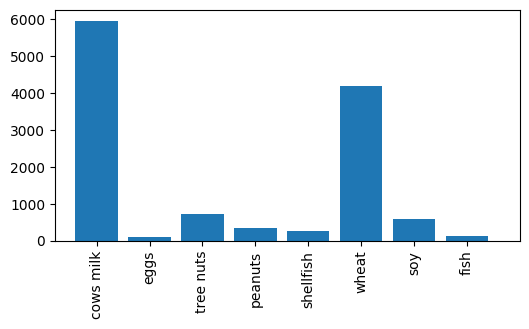

In [7]:
# plot the frequency of different common allergens
c_alls = list(allegen_ingredients.keys()) # get the common allergens names
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3))
ax1.bar(range(len(c_alls)), [sum(image_overview_df[k]>0) for k in c_alls])
ax1.set_xticks(range(1, 1+len(c_alls)))
ax1.set_xticks(range(len(c_alls)))
ax1.set_xticklabels(c_alls, rotation=90)

In [12]:
c_alls

['cows milk',
 'eggs',
 'tree nuts',
 'peanuts',
 'shellfish',
 'wheat',
 'soy',
 'fish']

In [11]:
# Stack the data from columns containing common allergens in the DataFrame into a multidimensional array all_arr, where the feature data for each image is treated as a dimension.
all_arr = np.stack(image_overview_df[c_alls].values, 0)
all_arr.shape

(9653, 8)

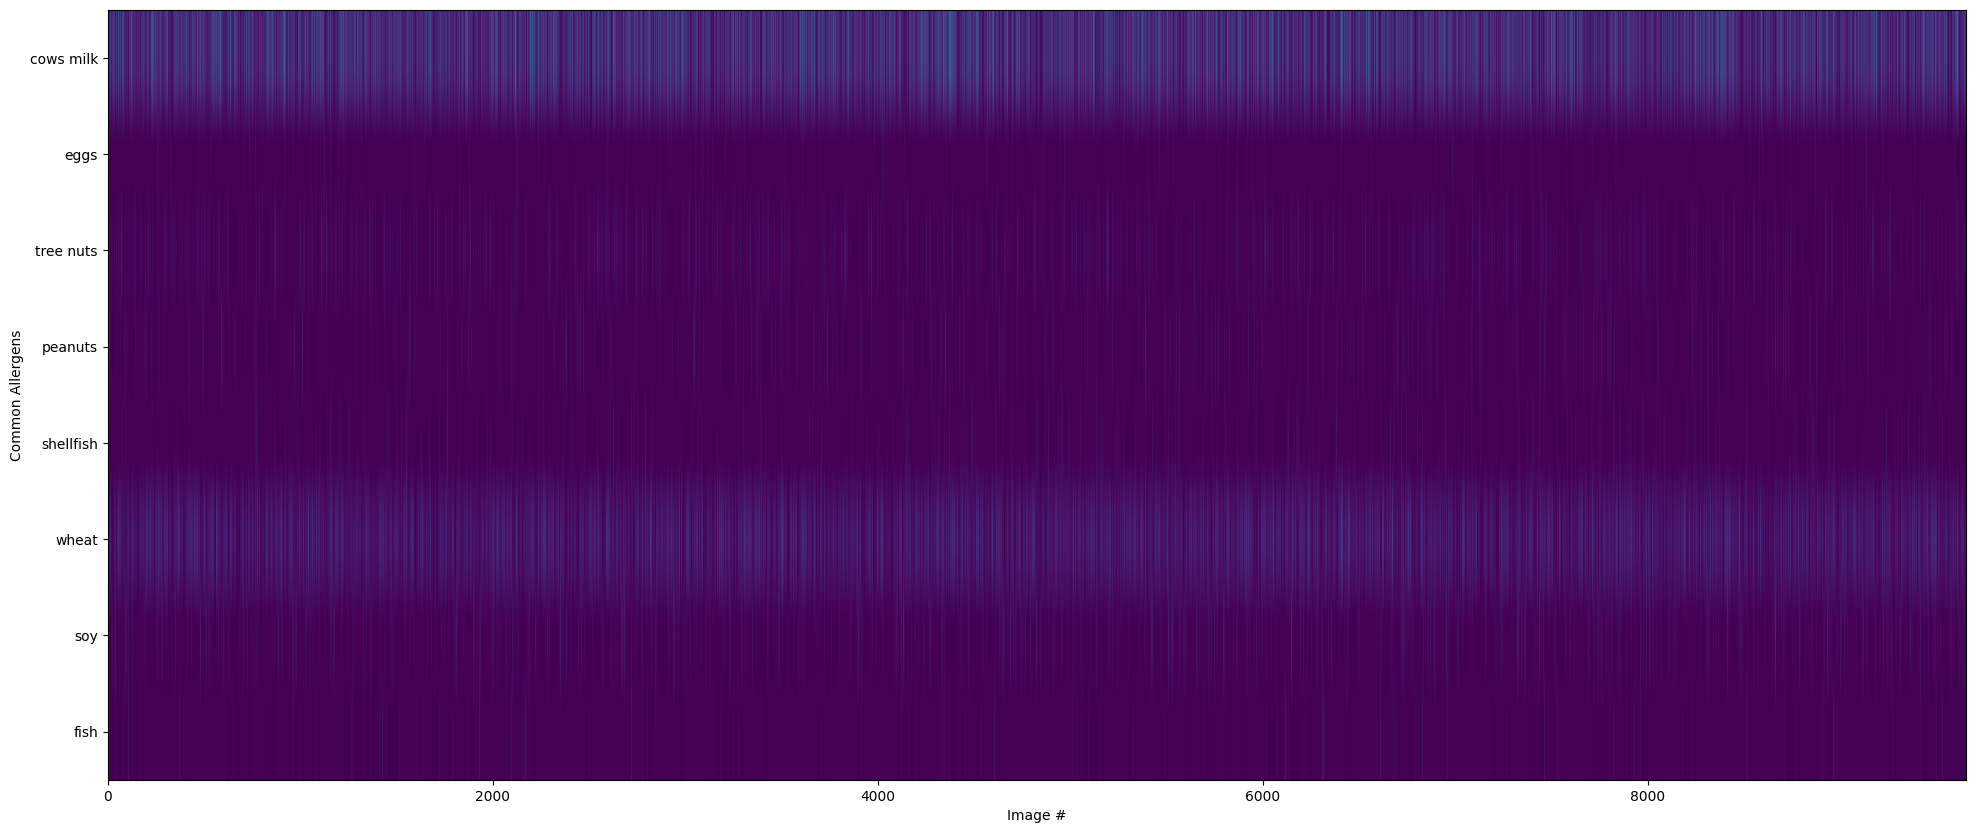

In [13]:
# plot common allergens mapping image features
fig, ax1 = plt.subplots(1, 1, figsize=(50, 10))
ax1.imshow(all_arr.T, cmap='viridis') 
ax1.set_aspect(500)
ax1.set_xlabel('Image #')
ax1.set_ylabel('Common Allergens')
ax1.set_yticks(range(len(c_alls)))
ax1.set_yticklabels(c_alls);

In [14]:
# extract sample set of the image features matching each common allergen for visualization
sample_images_df = pd.concat([image_overview_df.\
     groupby(image_overview_df[k].map(lambda x: x>0)).\
     apply(lambda x: x.sample(1)).\
     reset_index(drop=True) 
     for k in c_alls])
print(sample_images_df.shape)

(16, 18)


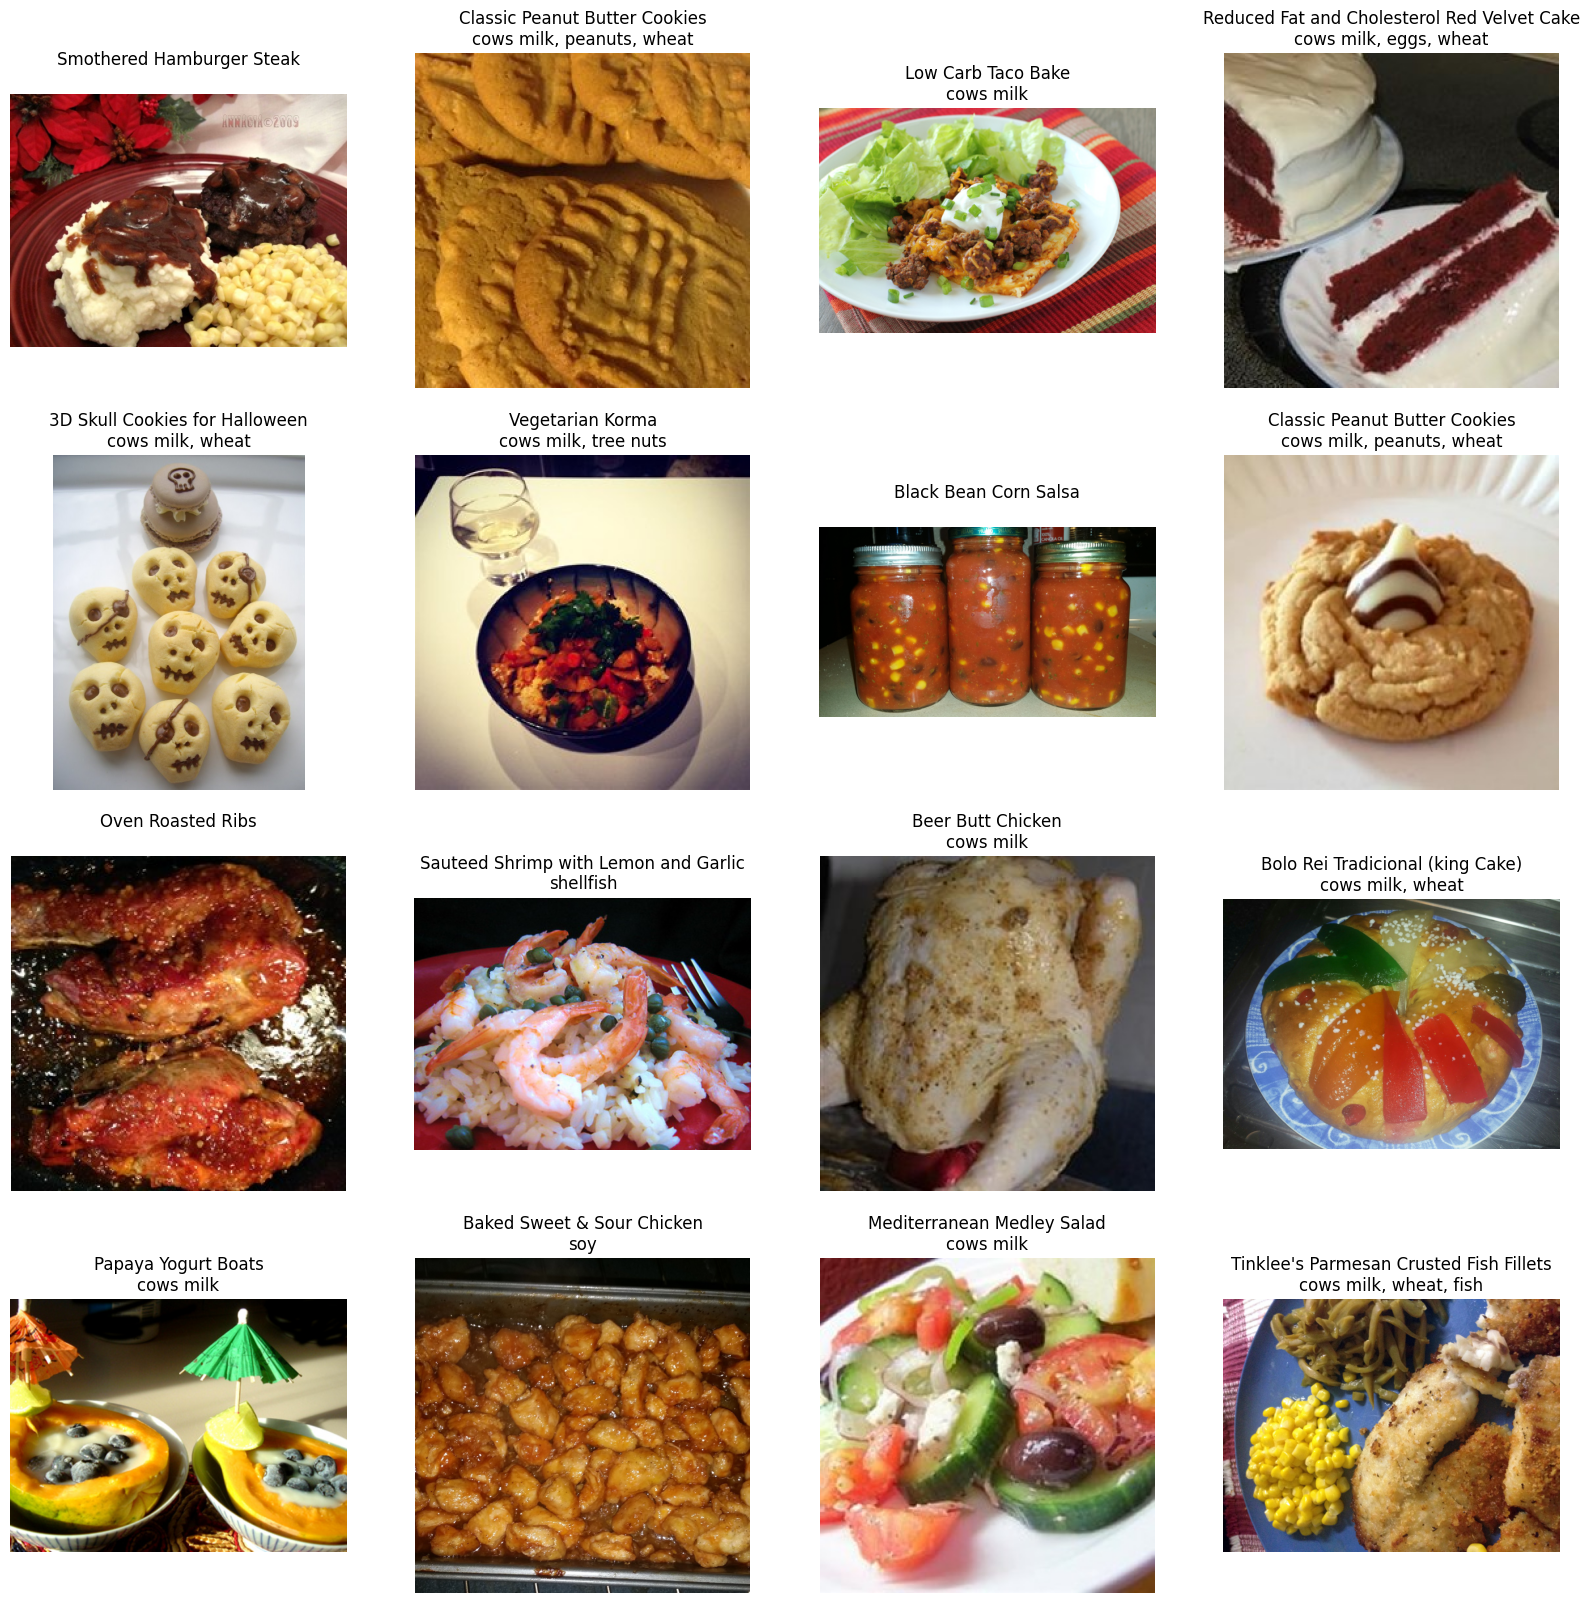

In [26]:
# plot the sample images with common allergens
fig, m_axs = plt.subplots(4, 4, figsize=(20, 20))
for c_ax, (_, c_row) in zip(m_axs.flatten(), sample_images_df.iterrows()):
    image_path = os.path.join(path + '/feature_food/subset', c_row['image_path'])
    c_ax.imshow(imread(image_path))
    c_title = ', '.join([k for k in c_alls if c_row[k] > 0])
    c_ax.set_title('{}\n{}'.format(c_row['title'], c_title))
    c_ax.axis('off')

In [27]:
# save the image features with common allergens to a json file
image_overview_df[['image_path', 'title', 'ingredients_list']+c_alls].to_json(path + '/feature_food/clean_list.json')